In [1]:
import pandas as pd

In [249]:
#upgrade sklearn
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 262.6 kB/s eta 0:00:41
   ---------------------------------------- 0.0/10.6 MB 281.8 kB/s eta 0:00:38
   ---------------------------------------- 0.1/10.6 MB 547.6 kB/s eta 0:00:20
    --------------------------------------- 0.2/10.6 MB 706.2 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.6 MB 850.1 kB/s eta 0:00:13
   - -------------------------------------- 0.3/10.6 MB 886.2 kB/s eta 0:00:12
   - -------------------------------------- 0.4/10.6 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.5/10.6 MB 1.1 MB/s eta 0:00:10
   -- --

In [14]:
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\supervised_ML\housing_iteration_0_2_classification.csv'
# Read the CSV file into a DataFrame
df_housing = pd.read_csv(file_path)
df_housing.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [15]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [16]:
X = df_housing
y = X.pop("Expensive")

In [17]:
#data spilitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [18]:
#Implement a Decision Tree
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [19]:
# make predictions
y_pred_tree_train = my_tree.predict(X_train)

In [20]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

0.9263698630136986

In [21]:
#Make predictions on the test set
y_pred_tree_test = my_tree.predict(X_test)

In [22]:
#check accuracy score
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.910958904109589

In [24]:
columns_list = list(X.columns)

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

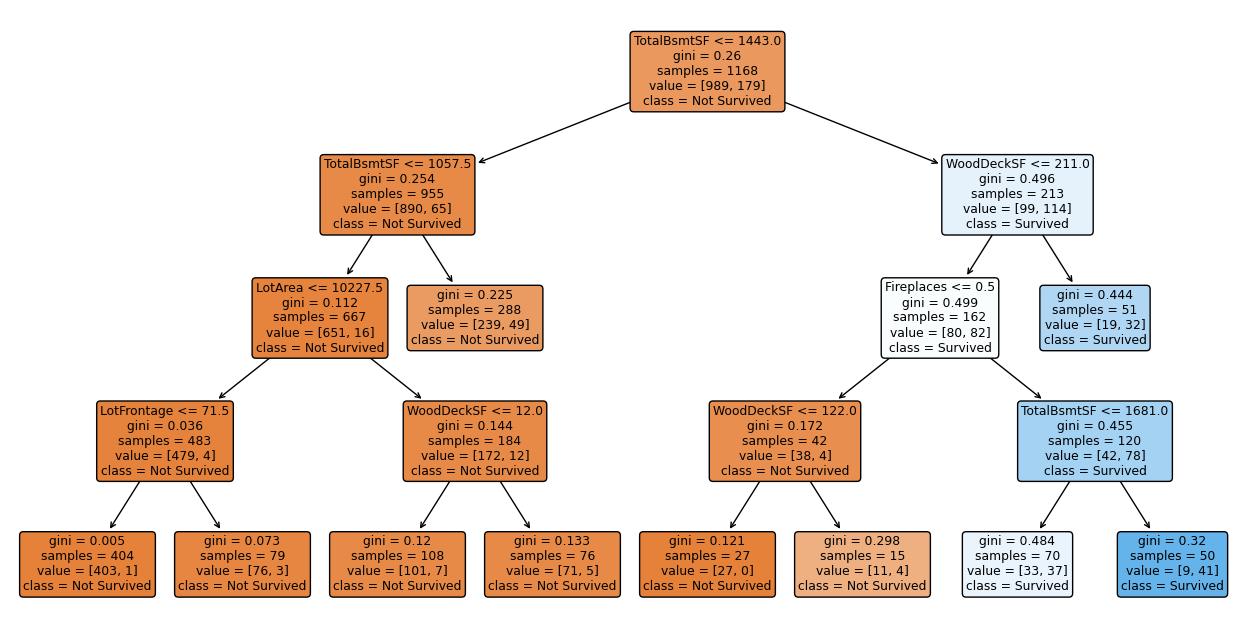

In [27]:
# Initialize Decision Tree Classifier with desired hyperparameters
pruned_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

# Train the pruned tree
pruned_tree.fit(X_train, y_train)

# Visualize the pruned tree
plt.figure(figsize=(16, 8))
plot_tree(
    pruned_tree,
    filled=True,
    rounded=True,
    class_names=['Not Survived', 'Survived'],
    feature_names=columns_list
)
plt.show()

In [28]:
#Fit the model to the train data.
my_tree.fit(X = X_train,
            y = y_train)

DecisionTreeClassifier()

In [29]:
# Check accuracy on the train set
#Use the model and the preprocessed train data to make predictions.

y_pred_tree_train = my_tree.predict(X_train)

In [30]:
y_pred_tree_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train)

0.940068493150685

 Pipeline creation
 

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [33]:
#Initialize transformer and model
imputer = SimpleImputer(strategy="median")
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10,
                               random_state=42)

In [34]:
#Create a pipeline
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [35]:
from sklearn.pipeline import Pipeline
pipe_2 = Pipeline([("imputer", imputer), ("classifier", dtree)]).set_output(transform='pandas')

In [36]:
#Fit the pipeline to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

In [37]:
#pipe presented like test
from sklearn import set_config

set_config(display="text")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

In [38]:
#switch to diagram
set_config(display="diagram")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

In [39]:
#Use the pipeline to make predictions
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

Use GridSearchCV to find the best parameters of the model

In [40]:
# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()

In [ ]:
# 2. Create a pipeline
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [41]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

In [42]:
for value in range(2, 12, 2):
    print(value)

2
4
6
8
10


In [43]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      verbose=1) # we want informative outputs during the training process

In [46]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=4,
                                                               min_samples_leaf=10,
                                                               random_state=42))]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

In [47]:
#Explore the best parameters and the best score achieved with your cross validation:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 38}

In [48]:
# the mean cross-validated score of the best estimator
search.best_score_

0.9280950808847805

In [49]:
# training accuracy
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9332191780821918

In [50]:
# testing accuracy
y_test_pred = search.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.934931506849315

Use GridSearchCV to find the best parameters of the pipeline

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
# initialize transformers & model
imputer = SimpleImputer()
scaler = StandardScaler()
dtree = DecisionTreeClassifier()

In [53]:
# create the pipeline
pipe = make_pipeline(imputer,
                     scaler,
                     dtree).set_output(transform='pandas')

In [54]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [55]:
# create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [56]:
# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      verbose=1)

In [58]:
# fit
search.fit(X_train, y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 14),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [59]:
# cross validation average accuracy
search.best_score_

0.929804008252284

In [60]:
# best parameters
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'simpleimputer__strategy': 'median',
 'standardscaler__with_mean': False,
 'standardscaler__with_std': True}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#New data frame of Housing

In [61]:
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\supervised_ML\housing_iteration_3_classification.csv'
# Read the CSV file into a DataFrame
df_housing_new = pd.read_csv(file_path)
df_housing_new.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc


In [74]:
#%missing values
round(df_housing_new.isna().sum() / len(df_housing_new) * 100, 2)

LotArea          0.00
LotFrontage     17.74
TotalBsmtSF      0.00
BedroomAbvGr     0.00
Fireplaces       0.00
PoolArea         0.00
GarageCars       0.00
WoodDeckSF       0.00
ScreenPorch      0.00
MSZoning         0.00
Condition1       0.00
Heating          0.00
Street           0.00
CentralAir       0.00
Foundation       0.00
dtype: float64

In [84]:
df_housing_new.isna().mean() * 100


LotArea          0.000000
LotFrontage     17.739726
TotalBsmtSF      0.000000
BedroomAbvGr     0.000000
Fireplaces       0.000000
PoolArea         0.000000
GarageCars       0.000000
WoodDeckSF       0.000000
ScreenPorch      0.000000
MSZoning         0.000000
Condition1       0.000000
Heating          0.000000
Street           0.000000
CentralAir       0.000000
Foundation       0.000000
dtype: float64

In [64]:
df_housing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   MSZoning      1460 non-null   object 
 10  Condition1    1460 non-null   object 
 11  Heating       1460 non-null   object 
 12  Street        1460 non-null   object 
 13  CentralAir    1460 non-null   object 
 14  Foundation    1460 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 171.2+ KB


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# X and y creation
X = df_housing_new
y = X.pop("Expensive")

# # Feature Engineering
# X.loc[:, "Cabin"] = X.Cabin.str[0] # that could be good when we have categorical column and the strings are too long, so we can just ask to show the first string

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Categorical encoding - "MANUAL" approach

In [67]:
# Replacing NaNs in categorical features
#There is no NaN value in categorical values

# selecting non-numerical columns
X_train_cat = X_train.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant",
                            fill_value="N_A").set_output(transform='pandas')

# fitting and transforming
X_cat_imputed = cat_imputer.fit_transform(X_train_cat)

X_cat_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
318,RL,Norm,GasA,Pave,Y,PConc
580,RL,Norm,GasA,Pave,Y,CBlock
961,RL,PosN,GasA,Pave,Y,CBlock
78,RL,Norm,GasA,Pave,N,CBlock
5,RL,Norm,GasA,Pave,Y,Wood


In [68]:
X_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 318 to 1389
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSZoning    1168 non-null   object
 1   Condition1  1168 non-null   object
 2   Heating     1168 non-null   object
 3   Street      1168 non-null   object
 4   CentralAir  1168 non-null   object
 5   Foundation  1168 non-null   object
dtypes: object(6)
memory usage: 63.9+ KB


In [65]:
##Replacing NaNs in numerical features
#there are some NAN in lotfrontage

# Selecting numerical columns
X_train_num = X_train.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean").set_output(transform='pandas')

# Fitting and transforming
X_num_imputed = num_imputer.fit_transform(X_train_num)

X_num_imputed.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0
78,10778.0,72.00000,1768.0,4.0,0.0,0.0,0.0,0.0,0.0
5,14115.0,85.00000,796.0,1.0,0.0,0.0,2.0,40.0,0.0


In [73]:
round(X_num_imputed.isna().sum() / len(X_num_imputed) * 100, 2)

LotArea         0.0
LotFrontage     0.0
TotalBsmtSF     0.0
BedroomAbvGr    0.0
Fireplaces      0.0
PoolArea        0.0
GarageCars      0.0
WoodDeckSF      0.0
ScreenPorch     0.0
dtype: float64

In [66]:
X_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 318 to 1389
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   float64
 1   LotFrontage   1168 non-null   float64
 2   TotalBsmtSF   1168 non-null   float64
 3   BedroomAbvGr  1168 non-null   float64
 4   Fireplaces    1168 non-null   float64
 5   PoolArea      1168 non-null   float64
 6   GarageCars    1168 non-null   float64
 7   WoodDeckSF    1168 non-null   float64
 8   ScreenPorch   1168 non-null   float64
dtypes: float64(9)
memory usage: 91.2 KB


In [69]:
# Concatenating all columns
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,RL,Norm,GasA,Pave,Y,PConc,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,RL,Norm,GasA,Pave,Y,CBlock,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,RL,PosN,GasA,Pave,Y,CBlock,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0
78,RL,Norm,GasA,Pave,N,CBlock,10778.0,72.00000,1768.0,4.0,0.0,0.0,0.0,0.0,0.0
5,RL,Norm,GasA,Pave,Y,Wood,14115.0,85.00000,796.0,1.0,0.0,0.0,2.0,40.0,0.0


 One Hot encoding

In [70]:
# import
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder(sparse_output=False).set_output(transform='pandas') #my_onehot = OneHotEncoder(drop="first",sparse_output=False).set_output(transform='pandas')

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

In [71]:
X_cat_imputed_onehot.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
580,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
961,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Concatenating "one-hot" columns with numerical columns:

In [72]:
X_imputed = pd.concat([X_cat_imputed_onehot, X_num_imputed], axis=1)

X_imputed.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,Foundation_Wood,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0


-Categorical encoding - "Automated" approach (Using Pipelines)

##Creating the "numeric pipe" and the "categoric pipe"

In [75]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").columns
X_num_columns = X.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False,handle_unknown='infrequent_if_exist',min_frequency=0.03)
)

Using ColumnTransformer a pipeline with 2 branches (the preprocessor)

In [76]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (numeric_pipe, X_num_columns),
    (categoric_pipe, X_cat_columns),
)

Creating the full_pipeline (preprocessor + Decision Tree)

In [77]:
full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

In [78]:
#We can then fit this full_pipeline to the data:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=0.03,
                                                                                 sparse_output=False))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [79]:
full_pipeline.predict(X_train)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

running GridSearchCV 

In [80]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'dtree': 0.9186786985070248}

Accessing steps of the pipeline

In [81]:
(full_pipeline
 .named_steps.columntransformer
 .named_transformers_['pipeline-1']
 .named_steps.simpleimputer
 .get_feature_names_out()
 )

array(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr',
       'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch'], dtype=object)

In [82]:
full_pipeline.named_steps.columntransformer.named_transformers_['pipeline-2'].named_steps.onehotencoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object)]

Including the imputer to the GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

best_param = search.best_params_

best_param

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 9}

###New data iteration6

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor


In [ ]:
# Set the maximum number of rows and columns to be displayed
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [185]:
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\supervised_ML\housing_iteration_6_regression.csv'
# Read the CSV file into a DataFrame
df_housing_new6 = pd.read_csv(file_path)
df_housing_new6.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
df_housing_new6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [94]:
df_housing_new6.shape

(1460, 81)

In [ ]:
df_housing_new6.isna().sum()


In [99]:
df_housing_new6.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


to check if all columns exist in the new data set

In [108]:
# Assuming df is your DataFrame
columns_to_check = ["LotShape", "Utilities", "ExterQual", 
                    "ExterCond", "BsmtQual", "BsmtCond", 
                    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                    "HeatingQC", "KitchenQual", "FireplaceQu", 
                    "GarageQual", "GarageCond", "PoolQC"]

# Check if the columns exist in the DataFrame
missing_columns = [col for col in columns_to_check if col not in df_housing_new6.columns]

if missing_columns:
    print("The following columns are missing:", missing_columns)
else:
    print("All columns exist in the DataFrame.")

All columns exist in the DataFrame.


Creating a SKLearn model 

In [186]:
X = df_housing_new6.copy()
y = X.pop('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [174]:
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\supervised_ML\housing_iteration_6_regression.csv'
# Read the CSV file into a DataFrame
df_housing_new6 = pd.read_csv(file_path)
df_housing_new6.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.model_selection import GridSearchCV
import pandas as pd
import sklearn
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\supervised_ML\housing_iteration_6_regression.csv'
# Read the CSV file into a DataFrame
df_housing_new6 = pd.read_csv(file_path)

X = df_housing_new6 
y = X.pop('SalePrice')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_cat = X_train.select_dtypes(exclude='number').columns
X_num = X_train.select_dtypes(include='number').columns
ordinal_cols = ["LotShape", "Utilities", "ExterQual", 
                      "ExterCond", "BsmtQual", "BsmtCond", 
                      "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                      "HeatingQC", "KitchenQual", "FireplaceQu", 
                      "GarageQual", "GarageCond", "PoolQC"]



onehot_cols = [col for col in X_cat if col not in ordinal_cols]


ordinal_rankings = [["NA", "IR3", "IR2","IR1", "Reg", "NA"],
                    ["NA", "ELO", "NoSeWa", "NoSewr", "AllPub"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "No", "Mn", "Av", "Gd"],
                    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
                    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Fa", "TA", "Gd", "Ex"]] 


cat_preprocessor = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_rankings), ordinal_cols),
    (OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), onehot_cols )
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"), 
    cat_preprocessor)

num_pipe = make_pipeline(
    SimpleImputer()
)


# Final preprocessor

preprocessor = make_column_transformer(
    (num_pipe, X_num),
    (cat_pipe, X_cat)
)
#DecisionTreeRegressor

dt_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            DecisionTreeRegressor())

dt_pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.model_selection import GridSearchCV
import pandas as pd
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\supervised_ML\housing_iteration_6_regression.csv'
# Read the CSV file into a DataFrame
df_housing_new6 = pd.read_csv(file_path)

X = df_housing_new6 
y = X.pop('SalePrice')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_cat = X_train.select_dtypes(exclude='number').columns
X_num = X_train.select_dtypes(include='number').columns
ordinal_cols = ["LotShape", "Utilities", "ExterQual", 
                      "ExterCond", "BsmtQual", "BsmtCond", 
                      "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                      "HeatingQC", "KitchenQual", "FireplaceQu", 
                      "GarageQual", "GarageCond", "PoolQC"]



onehot_cols = [col for col in X_cat if col not in ordinal_cols]


ordinal_rankings = [["NA", "IR3", "IR2","IR1", "Reg", "NA"],
                    ["NA", "ELO", "NoSeWa", "NoSewr", "AllPub"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "No", "Mn", "Av", "Gd"],
                    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
                    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
                    ["NA", "Fa", "TA", "Gd", "Ex"]] 


cat_preprocessor = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_rankings), ordinal_cols),
    # (OneHotEncoder(drop="first", sparse_, handle_unknown="ignore"), onehot_cols )
    (OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), onehot_cols )
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"), 
    cat_preprocessor)

num_pipe = make_pipeline(
    SimpleImputer()
)

# Final preprocessor

preprocessor = make_column_transformer(
    (num_pipe, X_num),
    (cat_pipe, X_cat)
)
#DecisionTreeRegressor

dt_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            DecisionTreeRegressor())

dt_pipeline.fit(X_train, y_train)

Predicting with the DecisionTreeRegressor

In [205]:
dt_predictions = dt_pipeline.predict(X_test)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [12, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [206]:
dt_r2 = r2_score(y_true = y_test,
                 y_pred = dt_predictions)

dt_r2

0.7790183069521962

SGDRegressor

In [207]:
sgd_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            SGDRegressor())

sgd_pipeline.fit(X_train, y_train)

sgd_predictions = sgd_pipeline.predict(X_test)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [12, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


 LinearRegression

In [208]:
lr_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            LinearRegression())

lr_pipeline.fit(X_train, y_train)

lr_predictions = lr_pipeline.predict(X_test)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [12, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Comparing our SKLearn models 

In [ ]:
sgd_r2 = r2_score(y_true = y_test,
                  y_pred = sgd_predictions)
lr_r2 = r2_score(y_true = y_test,
                 y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"R2": [dt_r2, sgd_r2, lr_r2]},
                                    index=["decision_tree", "sgd", "linear_regression"])

comparing_models_df

GradientBoostingRegressor

In [210]:
from sklearn.ensemble import GradientBoostingRegressor

# Define your pipeline with GradientBoostingRegressor
gb_pipeline = make_pipeline(preprocessor, GradientBoostingRegressor())

# Fit the pipeline to the training data
gb_pipeline.fit(X_train, y_train)

# Make predictions on the test data
gb_predictions = gb_pipeline.predict(X_test)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [12, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [211]:
sgd_r2 = r2_score(y_true = y_test,
                  y_pred = sgd_predictions)
lr_r2 = r2_score(y_true = y_test,
                 y_pred = lr_predictions)
gb_r2 = r2_score(y_true = y_test,
                  y_pred = gb_predictions)                

comparing_models_df = pd.DataFrame({"R2": [dt_r2, sgd_r2, lr_r2, gb_r2]},
                                    index=["decision_tree", "sgd", "linear_regression", "Gradient_Boost"])

comparing_models_df


,R2
decision_tree,0.779018
sgd,-5.058206
linear_regression,0.656660
Gradient_Boost,0.907568


 Feature selection based only on features

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel

In [231]:
#Variance Threshold

range_var_df = (pd.DataFrame({
                'Range': X_train[X_num].max() - X_train[X_num].min(),
                'Variance': X_train[X_num].var()})
                .sort_values(by='Variance'))

In [232]:
range_var_df.head()

,Range,Variance
KitchenAbvGr,3.0,0.050827
BsmtHalfBath,2.0,0.055833
HalfBath,2.0,0.249953
BsmtFullBath,3.0,0.270368
FullBath,3.0,0.299113


In [233]:
range_var_df.tail()

,Range,Variance
BsmtUnfSF,2336.0,1.992413e+05
BsmtFinSF1,5644.0,2.107462e+05
GrLivArea,5308.0,2.750296e+05
MiscVal,15500.0,3.058529e+05
LotArea,213945.0,1.157640e+08


The large variance observed could be attributed to their wider value range. Therefore, it's a good idea to scale the features before removing those with the smallest variance.
###
Scaling the data

In [236]:
# Initialize the scaler.
my_scaler = MinMaxScaler().set_output(transform="pandas")

# Fit the scaler to X_train and transform the values.
X_train_scaled = my_scaler.fit_transform(X_train[X_num])

In [ ]:
(
  pd.DataFrame({
  'Range': X_train_scaled.max() - X_train_scaled.min(),
  'Variance': X_train_scaled.var()})
  .sort_values(by='Variance')
)

In [238]:
selector = VarianceThreshold(threshold=0.02)

X_train_var = selector.fit_transform(X_train_scaled)

In [239]:
print("shape before:", X_train_scaled.shape)
print("shape after:", X_train_var.shape)

shape before: (1168, 37)
shape after: (1168, 17)


make sure to transform the test set using the transform method.

`first shoud apply imputind and encoding for the test set as well`


In [244]:
X_test_cat = X_test.select_dtypes(exclude='number').columns
X_test_num = X_test.select_dtypes(include='number').columns
# ordinal_cols = ["LotShape", "Utilities", "ExterQual", 
#                       "ExterCond", "BsmtQual", "BsmtCond", 
#                       "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
#                       "HeatingQC", "KitchenQual", "FireplaceQu", 
#                       "GarageQual", "GarageCond", "PoolQC"]



# onehot_cols = [col for col in X_cat if col not in ordinal_cols]


# ordinal_rankings = [["NA", "IR3", "IR2","IR1", "Reg", "NA"],
#                     ["NA", "ELO", "NoSeWa", "NoSewr", "AllPub"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "No", "Mn", "Av", "Gd"],
#                     ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
#                     ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
#                     ["NA", "Fa", "TA", "Gd", "Ex"]] 


# cat_preprocessor = make_column_transformer(
#     (OrdinalEncoder(categories=ordinal_rankings), ordinal_cols),
#     (OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore"), onehot_cols )
# )

# X_tets_num_imputer = SimpleImputer()


In [246]:
# Scale the test set
X_test_scaled = my_scaler.transform(X_test[X_test_num])

# Apply the variance threshold to the scaled test set
X_test_var = selector.transform(X_test_scaled)

###Let's check how well our model performs with the new dataset.###

In [ ]:
# Decision tree.
var_tree = DecisionTreeRegressor()
var_tree.fit(X_train_var, y_train)
var_tree_pred = var_tree.predict(X_test_var)

# sgd.
var_sgd = SGDRegressor()
var_sgd.fit(X_train_var, y_train)
var_sgd_pred = var_sgd.predict(X_test_var)

#linear regression.
var_lr = LinearRegression()
var_lr.fit(X_train_var, y_train)
var_lr_pred = var_lr.predict(X_test_var)

#GradientBoostingRegressor
var_gb = GradientBoostingRegressor()
var_gb.fit(X_train_var, y_train)
var_gb_pred = var_gb.predict(X_test_var)

performances.loc["varThreshold_0_02", "decision_tree"] = r2_score(y_test, var_tree_pred)
performances.loc["varThreshold_0_02", "sgd"] = r2_score(y_test, var_sgd_pred)
performances.loc["varThreshold_0_02", "Linear_Regression"] = r2_score(y_test, var_lr_pred)
performances.loc["varThreshold_0_02", "GradientBoosting_Regressor"] = r2_score(y_test, var_gb_pred)

performances